# Test

## Import

In [31]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import time

## Function Declaration

In [19]:
def find_largest_safe_zone(img, left_pct, right_pct, top_pct, bottom_pct, faces):
    # Load the image
    img_height, img_width = img.shape[:2]

    # Calculate the boundary limits
    left_bound = int(left_pct * img_width)
    right_bound = int((1 - right_pct) * img_width)
    top_bound = int(top_pct * img_height)
    bottom_bound = int((1 - bottom_pct) * img_height)

    # Initialize the binary matrix based on some discretization
    # Note: For simplicity, let's assume we're working with the full pixel grid
    binary_matrix = np.ones((img_height, img_width), dtype=int)
    
    # Mark areas outside the allowed boundaries as occupied (0)
    binary_matrix[:, :left_bound] = 0
    binary_matrix[:, right_bound:] = 0
    binary_matrix[:top_bound, :] = 0
    binary_matrix[bottom_bound:, :] = 0

    # Mark areas occupied by faces as occupied (0)
    for x, y, w, h in faces:
        binary_matrix[y:y+h, x:x+w] = 0

    return binary_matrix

In [20]:
def maximal_rectangle(matrix):
    if not matrix or not matrix[0]:
        return 0, 0, 0, 0, 0  # Return area, x, y, width, height with area 0 for empty matrix

    max_area = 0
    n = len(matrix)  # Number of rows in the matrix
    m = len(matrix[0])  # Number of columns in the matrix
    height = [0] * m
    left = [0] * m
    right = [m] * m
    max_rectangle = (0, 0, 0, 0, 0)  # area, x, y, width, height

    for i in range(n):
        cur_left, cur_right = 0, m
        # Update height
        for j in range(m):
            if matrix[i][j] == '1':
                height[j] += 1
            else:
                height[j] = 0
        # Update left
        for j in range(m):
            if matrix[i][j] == '1':
                left[j] = max(left[j], cur_left)
            else:
                left[j] = 0
                cur_left = j + 1
        # Update right
        for j in range(m-1, -1, -1):
            if matrix[i][j] == '1':
                right[j] = min(right[j], cur_right)
            else:
                right[j] = m
                cur_right = j
        # Compute the area of rectangle (can do this for every row)
        for j in range(m):
            area = (right[j] - left[j]) * height[j]
            if area > max_area:
                max_area = area
                # Convert bottom-left y coordinate to top-left y coordinate for OpenCV
                top_left_y = i - height[j] + 1
                max_rectangle = (left[j], top_left_y, right[j] - left[j], height[j])

    return max_rectangle  # Returns x, y, width, height


In [21]:
def draw_safe_zone(image, safe_zone):
    """
    Draw a green rectangle around the safe zone.
    """
    x, y, w, h = safe_zone
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)
    return image

In [22]:
img = cv2.imread('samples/sample_4.png')

In [23]:
face_cascade = cv2.CascadeClassifier('model/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(img)

In [24]:
# check faces location

# for (x, y, w, h) in faces:
#     cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 1)
    
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plt.figure(figsize=(20,10))
# plt.imshow(img_rgb)
# plt.axis('off')

In [25]:
left_pct, right_pct, top_pct, bottom_pct = 0.05, 0.05, 0.05, 0.05

binary_array = find_largest_safe_zone(img, left_pct, right_pct, top_pct, bottom_pct, faces)

array = binary_array.astype(str).tolist()

In [26]:
result_img = draw_safe_zone(img, (maximal_rectangle(array)))
img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

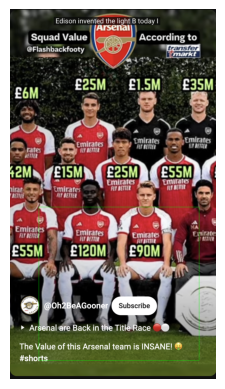

In [27]:
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [11]:
img.shape

(1264, 702, 3)

In [12]:
faces

array([[ 434,  283,   65,   65],
       [ 614,  289,   59,   59],
       [  29,  322,   57,   57],
       [ 238,  302,   69,   69],
       [ 524,  419,   69,   69],
       [ 346,  431,   65,   65],
       [ 166,  456,   63,   63],
       [   0,  458,   57,   57],
       [ 429,  610,   66,   66],
       [ 629,  605,   65,   65],
       [  42,  592,   65,   65],
       [ 237,  599,   68,   68],
       [  32,  982,   66,   66],
       [ 644, 1012,   54,   54]], dtype=int32)

## Final Function

### For Image

In [168]:
def image_checker(img_path, left_pct, right_pct, top_pct, bottom_pct):
    img = cv2.imread(img_path)
    face_cascade = cv2.CascadeClassifier('model/haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(img)

    binary_array = find_largest_safe_zone(img, left_pct, right_pct, top_pct, bottom_pct, faces)
    array = binary_array.astype(str).tolist()
    
    result_img = draw_safe_zone(img, (maximal_rectangle(array)))
    img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
    
#     plt.imshow(img_rgb)
#     plt.axis('off')
#     plt.show()

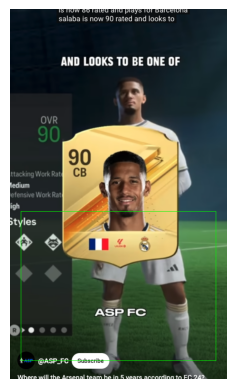

In [175]:
left_pct, right_pct, top_pct, bottom_pct = 0.05,  0.1, 0.05, 0.15
image_checker('samples/sample_3.png', left_pct, right_pct, top_pct, bottom_pct)

### For Video

In [55]:
def frame_checker(face_cascade, frame, left_pct, right_pct, top_pct, bottom_pct):
    faces = face_cascade.detectMultiScale(frame)

    binary_array = find_largest_safe_zone(frame, left_pct, right_pct, top_pct, bottom_pct, faces)
    array = binary_array.astype(str).tolist()
    
    result_frame = draw_safe_zone(frame, (maximal_rectangle(array)))
    frame_rgb = cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB)
    
    return frame_rgb

In [83]:
vcap = cv2.VideoCapture('samples/video_test_4_90_trimmed.mp4')

In [13]:
left_pct, right_pct, top_pct, bottom_pct = 0.05,  0.1, 0.05, 0.15

In [85]:
while(vcap.isOpened()):
    ret, frame = vcap.read()
    
    if not ret:
        print("Can't receive frame. Exiting ...")
        break
        
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    cv2.imshow('frame', image_checker(frame_rgb, left_pct, right_pct, top_pct, bottom_pct))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
vcap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [53]:
def timer(frames_processed, start_time, fps, total_frames):
    frames_processed += 1

    # Calculate the average processing time per frame up to this point
    elapsed_time = (time.time() - start_time)
    average_time_per_frame = elapsed_time / frames_processed

    # Calculate the estimated remaining time
    remaining_frames = total_frames - frames_processed
    estimated_remaining_time = remaining_frames * average_time_per_frame
    print(f"Total frames: {total_frames}, Remaining frames: {remaining_frames}, Est. remaining time: {estimated_remaining_time:.1f} s, Total elapsed time: {elapsed_time:.1f}")
        
    return frames_processed

In [54]:
def add_safe_zone_to_video(input_video_path, output_video_path):
    # Open the input video
    cap = cv2.VideoCapture(input_video_path)
    
    # Obtain video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Define the codec and create a VideoWriter object to write the output video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Use 'XVID' if you face issues with 'mp4v'
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))
    
    frames_processed = 0
    start_time = time.time()
    
    face_cascade = cv2.CascadeClassifier('model/haarcascade_frontalface_default.xml')
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        edited_frame = frame_checker(face_cascade, img, left_pct, right_pct, top_pct, bottom_pct)
        
        # Write the frame with the safe zone to the output video
        out.write(frame)
        
        frames_processed = timer(frames_processed, start_time, fps, total_frames)
        
        # Break the loop if 'q' is pressed (for real-time viewing)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    # Release everything when job is finished
    cap.release()
    out.release()
    cv2.destroyAllWindows()

# Example usage
input_video_path = 'samples/video_test_1.mp4'
output_video_path = 'samples/video_test_1_output.mp4'
add_safe_zone_to_video(input_video_path, output_video_path)


Total frames: 2289, Remaining frames: 2288, Est. remaining time: 1126.1 s, Total elapsed time: 0.5
Total frames: 2289, Remaining frames: 2287, Est. remaining time: 1029.4 s, Total elapsed time: 0.9
Total frames: 2289, Remaining frames: 2286, Est. remaining time: 996.9 s, Total elapsed time: 1.3
Total frames: 2289, Remaining frames: 2285, Est. remaining time: 981.1 s, Total elapsed time: 1.7
Total frames: 2289, Remaining frames: 2284, Est. remaining time: 973.6 s, Total elapsed time: 2.1
Total frames: 2289, Remaining frames: 2283, Est. remaining time: 967.2 s, Total elapsed time: 2.5
Total frames: 2289, Remaining frames: 2282, Est. remaining time: 962.7 s, Total elapsed time: 3.0
Total frames: 2289, Remaining frames: 2281, Est. remaining time: 959.0 s, Total elapsed time: 3.4
Total frames: 2289, Remaining frames: 2280, Est. remaining time: 958.4 s, Total elapsed time: 3.8
Total frames: 2289, Remaining frames: 2279, Est. remaining time: 956.4 s, Total elapsed time: 4.2
Total frames: 2289

KeyboardInterrupt: 

## Combined

In [57]:
def find_largest_safe_zone(img, left_pct, right_pct, top_pct, bottom_pct, faces):
    # Load the image
    img_height, img_width = img.shape[:2]

    # Calculate the boundary limits
    left_bound = int(left_pct * img_width)
    right_bound = int((1 - right_pct) * img_width)
    top_bound = int(top_pct * img_height)
    bottom_bound = int((1 - bottom_pct) * img_height)

    # Initialize the binary matrix based on some discretization
    # Note: For simplicity, let's assume we're working with the full pixel grid
    binary_matrix = np.ones((img_height, img_width), dtype=int)
    
    # Mark areas outside the allowed boundaries as occupied (0)
    binary_matrix[:, :left_bound] = 0
    binary_matrix[:, right_bound:] = 0
    binary_matrix[:top_bound, :] = 0
    binary_matrix[bottom_bound:, :] = 0

    # Mark areas occupied by faces as occupied (0)
    for x, y, w, h in faces:
        binary_matrix[y:y+h, x:x+w] = 0

    return binary_matrix

In [58]:
def maximal_rectangle(matrix):
    if not matrix or not matrix[0]:
        return 0, 0, 0, 0, 0  # Return area, x, y, width, height with area 0 for empty matrix

    max_area = 0
    n = len(matrix)  # Number of rows in the matrix
    m = len(matrix[0])  # Number of columns in the matrix
    height = [0] * m
    left = [0] * m
    right = [m] * m
    max_rectangle = (0, 0, 0, 0, 0)  # area, x, y, width, height

    for i in range(n):
        cur_left, cur_right = 0, m
        # Update height
        for j in range(m):
            if matrix[i][j] == '1':
                height[j] += 1
            else:
                height[j] = 0
        # Update left
        for j in range(m):
            if matrix[i][j] == '1':
                left[j] = max(left[j], cur_left)
            else:
                left[j] = 0
                cur_left = j + 1
        # Update right
        for j in range(m-1, -1, -1):
            if matrix[i][j] == '1':
                right[j] = min(right[j], cur_right)
            else:
                right[j] = m
                cur_right = j
        # Compute the area of rectangle (can do this for every row)
        for j in range(m):
            area = (right[j] - left[j]) * height[j]
            if area > max_area:
                max_area = area
                # Convert bottom-left y coordinate to top-left y coordinate for OpenCV
                top_left_y = i - height[j] + 1
                max_rectangle = (left[j], top_left_y, right[j] - left[j], height[j])

    return max_rectangle  # Returns x, y, width, height


In [59]:
def draw_safe_zone(image, safe_zone):
    """
    Draw a green rectangle around the safe zone.
    """
    x, y, w, h = safe_zone
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return image

In [70]:
def timer(frames_processed, start_time, fps, total_frames):
    frames_processed += 1

    # Calculate the average processing time per frame up to this point
    elapsed_time = (time.time() - start_time)
    average_time_per_frame = elapsed_time / frames_processed

    # Calculate the estimated remaining time
    remaining_frames = total_frames - frames_processed
    estimated_remaining_time = remaining_frames * average_time_per_frame
    print(f"Total frames: {total_frames}, Remaining frames: {remaining_frames}, Est. remaining time: {estimated_remaining_time:.1f} s, Total elapsed time: {elapsed_time:.1f}, FPS: {1/average_time_per_frame:.2f}")
        
    return frames_processed

In [73]:
def frame_checker(face_cascade, frame, left_pct, right_pct, top_pct, bottom_pct):
    faces = face_cascade.detectMultiScale(frame)

    binary_array = find_largest_safe_zone(frame, left_pct, right_pct, top_pct, bottom_pct, faces)
    array = binary_array.astype(str).tolist()
    
    result_frame = draw_safe_zone(frame, (maximal_rectangle(array)))
#     frame_rgb = cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB)
    
    return result_frame

In [74]:
def add_safe_zone_to_video(input_video_path, output_video_path):
    # Open the input video
    cap = cv2.VideoCapture(input_video_path)
    
    # Obtain video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Define the codec and create a VideoWriter object to write the output video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Use 'XVID' if you face issues with 'mp4v'
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))
    
    frames_processed = 0
    start_time = time.time()
    
    face_cascade = cv2.CascadeClassifier('model/haarcascade_frontalface_default.xml')
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        edited_frame = frame_checker(face_cascade, frame, left_pct, right_pct, top_pct, bottom_pct)
        
        # Write the frame with the safe zone to the output video
        out.write(edited_frame)
        
        frames_processed = timer(frames_processed, start_time, fps, total_frames)
        
        # Break the loop if 'q' is pressed (for real-time viewing)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    # Release everything when job is finished
    cap.release()
    out.release()
    cv2.destroyAllWindows()

# Example usage
input_video_path = 'samples/video_test_4.mp4'
output_video_path = input_video_path[:-4] + '_output.mp4'
add_safe_zone_to_video(input_video_path, output_video_path)


Total frames: 416, Remaining frames: 415, Est. remaining time: 406.3 s, Total elapsed time: 1.0, FPS: 1.02
Total frames: 416, Remaining frames: 414, Est. remaining time: 385.8 s, Total elapsed time: 1.9, FPS: 1.07
Total frames: 416, Remaining frames: 413, Est. remaining time: 387.9 s, Total elapsed time: 2.8, FPS: 1.06
Total frames: 416, Remaining frames: 412, Est. remaining time: 378.6 s, Total elapsed time: 3.7, FPS: 1.09
Total frames: 416, Remaining frames: 411, Est. remaining time: 374.7 s, Total elapsed time: 4.6, FPS: 1.10
Total frames: 416, Remaining frames: 410, Est. remaining time: 371.1 s, Total elapsed time: 5.4, FPS: 1.10
Total frames: 416, Remaining frames: 409, Est. remaining time: 368.6 s, Total elapsed time: 6.3, FPS: 1.11
Total frames: 416, Remaining frames: 408, Est. remaining time: 366.0 s, Total elapsed time: 7.2, FPS: 1.11
Total frames: 416, Remaining frames: 407, Est. remaining time: 366.8 s, Total elapsed time: 8.1, FPS: 1.11
Total frames: 416, Remaining frames: 

Total frames: 416, Remaining frames: 339, Est. remaining time: 302.2 s, Total elapsed time: 68.7, FPS: 1.12
Total frames: 416, Remaining frames: 338, Est. remaining time: 301.7 s, Total elapsed time: 69.6, FPS: 1.12
Total frames: 416, Remaining frames: 337, Est. remaining time: 300.7 s, Total elapsed time: 70.5, FPS: 1.12
Total frames: 416, Remaining frames: 336, Est. remaining time: 299.8 s, Total elapsed time: 71.4, FPS: 1.12
Total frames: 416, Remaining frames: 335, Est. remaining time: 298.8 s, Total elapsed time: 72.3, FPS: 1.12
Total frames: 416, Remaining frames: 334, Est. remaining time: 297.9 s, Total elapsed time: 73.1, FPS: 1.12
Total frames: 416, Remaining frames: 333, Est. remaining time: 296.9 s, Total elapsed time: 74.0, FPS: 1.12
Total frames: 416, Remaining frames: 332, Est. remaining time: 295.9 s, Total elapsed time: 74.9, FPS: 1.12
Total frames: 416, Remaining frames: 331, Est. remaining time: 295.0 s, Total elapsed time: 75.8, FPS: 1.12
Total frames: 416, Remaining

Total frames: 416, Remaining frames: 263, Est. remaining time: 234.0 s, Total elapsed time: 136.1, FPS: 1.12
Total frames: 416, Remaining frames: 262, Est. remaining time: 233.1 s, Total elapsed time: 137.0, FPS: 1.12
Total frames: 416, Remaining frames: 261, Est. remaining time: 232.2 s, Total elapsed time: 137.9, FPS: 1.12
Total frames: 416, Remaining frames: 260, Est. remaining time: 231.3 s, Total elapsed time: 138.8, FPS: 1.12
Total frames: 416, Remaining frames: 259, Est. remaining time: 230.4 s, Total elapsed time: 139.6, FPS: 1.12
Total frames: 416, Remaining frames: 258, Est. remaining time: 229.4 s, Total elapsed time: 140.5, FPS: 1.12
Total frames: 416, Remaining frames: 257, Est. remaining time: 228.5 s, Total elapsed time: 141.4, FPS: 1.12
Total frames: 416, Remaining frames: 256, Est. remaining time: 227.7 s, Total elapsed time: 142.3, FPS: 1.12
Total frames: 416, Remaining frames: 255, Est. remaining time: 226.8 s, Total elapsed time: 143.2, FPS: 1.12
Total frames: 416, 

Total frames: 416, Remaining frames: 187, Est. remaining time: 165.8 s, Total elapsed time: 203.1, FPS: 1.13
Total frames: 416, Remaining frames: 186, Est. remaining time: 164.9 s, Total elapsed time: 204.0, FPS: 1.13
Total frames: 416, Remaining frames: 185, Est. remaining time: 164.0 s, Total elapsed time: 204.8, FPS: 1.13
Total frames: 416, Remaining frames: 184, Est. remaining time: 163.1 s, Total elapsed time: 205.7, FPS: 1.13
Total frames: 416, Remaining frames: 183, Est. remaining time: 162.3 s, Total elapsed time: 206.6, FPS: 1.13
Total frames: 416, Remaining frames: 182, Est. remaining time: 161.4 s, Total elapsed time: 207.5, FPS: 1.13
Total frames: 416, Remaining frames: 181, Est. remaining time: 160.5 s, Total elapsed time: 208.3, FPS: 1.13
Total frames: 416, Remaining frames: 180, Est. remaining time: 159.5 s, Total elapsed time: 209.2, FPS: 1.13
Total frames: 416, Remaining frames: 179, Est. remaining time: 158.7 s, Total elapsed time: 210.1, FPS: 1.13
Total frames: 416, 

Total frames: 416, Remaining frames: 111, Est. remaining time: 98.0 s, Total elapsed time: 269.4, FPS: 1.13
Total frames: 416, Remaining frames: 110, Est. remaining time: 97.2 s, Total elapsed time: 270.3, FPS: 1.13
Total frames: 416, Remaining frames: 109, Est. remaining time: 96.3 s, Total elapsed time: 271.1, FPS: 1.13
Total frames: 416, Remaining frames: 108, Est. remaining time: 95.4 s, Total elapsed time: 272.0, FPS: 1.13
Total frames: 416, Remaining frames: 107, Est. remaining time: 94.5 s, Total elapsed time: 272.9, FPS: 1.13
Total frames: 416, Remaining frames: 106, Est. remaining time: 93.6 s, Total elapsed time: 273.7, FPS: 1.13
Total frames: 416, Remaining frames: 105, Est. remaining time: 92.7 s, Total elapsed time: 274.6, FPS: 1.13
Total frames: 416, Remaining frames: 104, Est. remaining time: 91.8 s, Total elapsed time: 275.5, FPS: 1.13
Total frames: 416, Remaining frames: 103, Est. remaining time: 90.9 s, Total elapsed time: 276.3, FPS: 1.13
Total frames: 416, Remaining

Total frames: 416, Remaining frames: 34, Est. remaining time: 30.0 s, Total elapsed time: 336.9, FPS: 1.13
Total frames: 416, Remaining frames: 33, Est. remaining time: 29.1 s, Total elapsed time: 337.8, FPS: 1.13
Total frames: 416, Remaining frames: 32, Est. remaining time: 28.2 s, Total elapsed time: 338.7, FPS: 1.13
Total frames: 416, Remaining frames: 31, Est. remaining time: 27.3 s, Total elapsed time: 339.5, FPS: 1.13
Total frames: 416, Remaining frames: 30, Est. remaining time: 26.5 s, Total elapsed time: 340.4, FPS: 1.13
Total frames: 416, Remaining frames: 29, Est. remaining time: 25.6 s, Total elapsed time: 341.3, FPS: 1.13
Total frames: 416, Remaining frames: 28, Est. remaining time: 24.7 s, Total elapsed time: 342.2, FPS: 1.13
Total frames: 416, Remaining frames: 27, Est. remaining time: 23.8 s, Total elapsed time: 343.1, FPS: 1.13
Total frames: 416, Remaining frames: 26, Est. remaining time: 22.9 s, Total elapsed time: 343.9, FPS: 1.13
Total frames: 416, Remaining frames: 

## Rotated Face

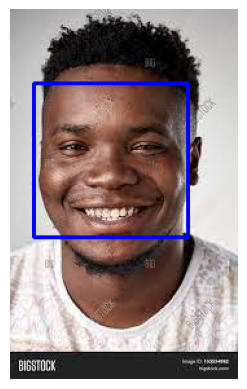

In [82]:
def detect_faces_in_rotations(image, face_cascade, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30)):
    # Define the rotation angles
    rotation_angles = [90, 270]
    detected_faces = []

    original_w, original_h = image.shape[1], image.shape[0]

    for angle in rotation_angles:
        # Rotate the image
        rotated_image, M = rotate_image(image, angle)
        
        # Convert the rotated image to grayscale
        gray_image = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)
        
        # Detect faces
        faces = face_cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, 
                                              minNeighbors=minNeighbors, minSize=minSize)
        
        if len(faces) > 0:
            # If faces are detected, adjust their positions based on the rotation angle
            for (x, y, w, h) in faces:
                # Calculate the inverse rotation for the detected face coordinates
                inv_M = cv2.invertAffineTransform(M)
                original_coords = np.array([[x + w/2, y + h/2]], dtype=np.float32)
                original_coords = np.array([original_coords])
                # Transform back the coordinates of the center of the face
                transformed_coords = cv2.transform(original_coords, inv_M)
                ox, oy = transformed_coords[0][0]
                ox, oy = int(ox - w/2), int(oy - h/2)
                
                # Store the corrected face box
                detected_faces.append((ox, oy, w, h))
            break  # Stop if faces are detected in the current orientation

    return detected_faces


def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)

    # Get the rotation matrix for the specified angle
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)

    # Perform the rotation
    cos = abs(M[0, 0])
    sin = abs(M[0, 1])

    # Compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))

    # Adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY

    # Perform the actual rotation and return the image
    rotated_image = cv2.warpAffine(image, M, (nW, nH))

    return rotated_image, M

# Usage example
cascade_path = "model/haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(cascade_path)

# Load an image
image = cv2.imread("samples/sample_2.jpeg")

# Detect faces considering rotations
faces = detect_faces_in_rotations(image, face_cascade)

# Draw rectangles around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the output
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()
